**Travel Insurance Sell Prediction**


---


Our client is an Airline and they want to provide Travel Insurance to its customers.

The client has been collecting customer data for a couple of years and needs our help to build a model to predict whether a customer would be interested in Travel Insurance. We have information about customers' demographics, incomes, and travel frequency. We will create an algorithm using this information to find out if a customer would be interested in Travel Insurance.

This algorithm will be helpful for our client to find possible customers and reach out with the best advertisement strategy.


---

**Variable Definitions**

Age : Customer's age 

Employment Type : The sector in the customer's work

GraduateOrNot : Is the customer graduated from college?

AnnualIncome : Yearly income of the customer

FamilyMembers : How many first-degree family members do customers have?

ChronicDiseases : Is the customer have any chronic diseases?

FrequentFlyer : Is the customer frequently use an airline?

EverTravelledAbroad : Is the customer ever traveled abroad before?

TravelInsurance : Do customers have travel insurance?

In [1]:
# Import data
import pandas as pd

df=pd.read_csv("TravelInsurance.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [2]:
# Exploration of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


* We have 4 object type column and an unusable index column which we will deal later

In [3]:
# Is there any duplicated value
df.duplicated().sum()

0

In [4]:
# Is there any missing value
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [5]:
# Let's check what are these 4 object we will deal
for i in df.columns:
    if df[i].dtypes=="object":
        print(i, df[i].unique())

Employment Type ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot ['Yes' 'No']
FrequentFlyer ['No' 'Yes']
EverTravelledAbroad ['No' 'Yes']


* Now we know that there is no missing or duplicated value in our dataset.

* We know that there are 4 object-type data which we will convert to integers later.

* One unusable index column which we will delete later.

* We are ready to visualize our data.



---


**Data Visualization**

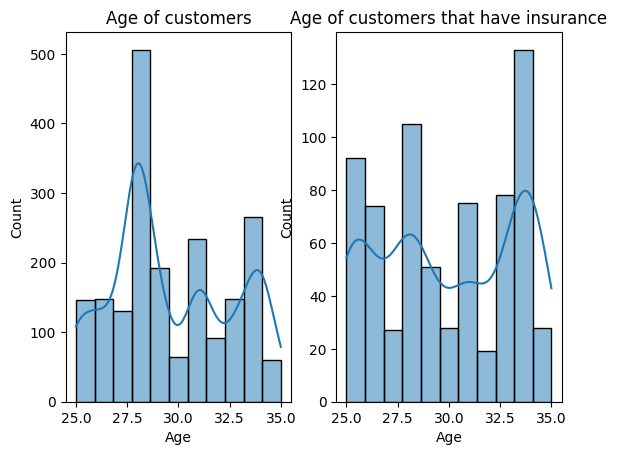

In [6]:
import seaborn as sea
import matplotlib.pyplot as plt

# Age histogram of all customers
plt.subplot(1, 2, 1)
sea.histplot(data=df, x="Age", bins=11, kde=True)
plt.title("Age of customers")


# Age histogram of customers that have insurance
plt.subplot(1, 2, 2)
sea.histplot(data=df[df["TravelInsurance"] == 1],x="Age", bins=11, kde=True)
plt.ylabel("Count")
plt.xlabel("Age")
plt.title("Age of customers that have insurance")
plt.show()

* Our customers are generally young but insurace acceptance is higher in older ages.

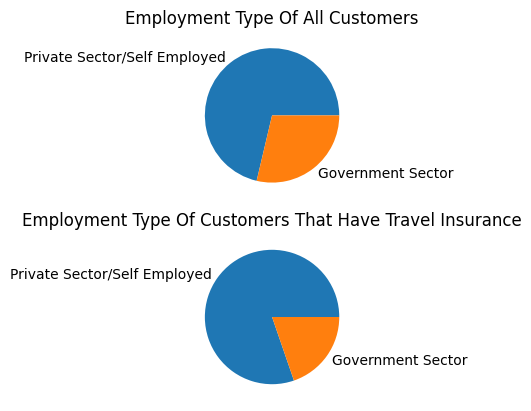

In [7]:
#Employment type of all customers
plt.subplot(2, 1, 1)
plt.pie(df["Employment Type"].value_counts(), labels=df["Employment Type"].value_counts().index)
plt.title("Employment Type Of All Customers")

#Employment type of customers that have insurance
plt.subplot(2, 1, 2)
plt.pie(df[df["TravelInsurance"] == 1]["Employment Type"].value_counts(), labels=df["Employment Type"].value_counts().index)
plt.title("Employment Type Of Customers That Have Travel Insurance")

plt.show()

* Customers from the private sector are more willing to make travel insurance.

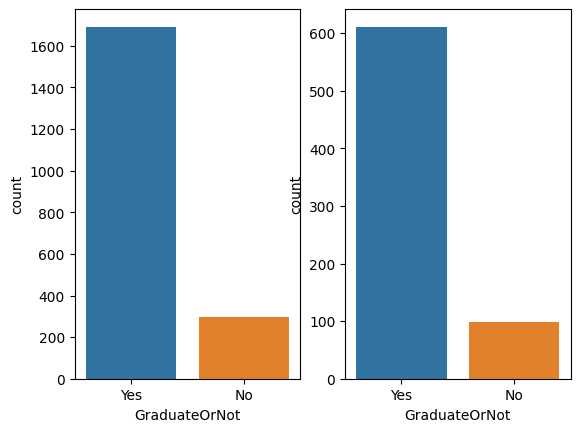

In [8]:
#Education of all customers
plt.subplot(1, 2, 1)
sea.countplot(data=df, x="GraduateOrNot")

#Education of customers that have insurance
plt.subplot(1, 2, 2)
sea.countplot(data=df[(df["TravelInsurance"] == 1)], x="GraduateOrNot")
plt.show()

* Education does not have a major effect on travel insurance.

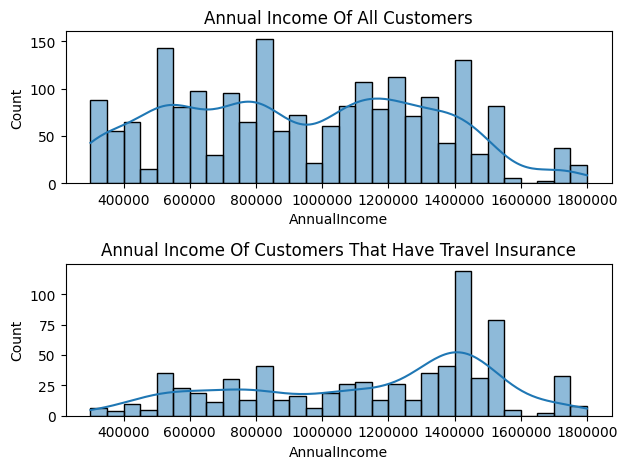

In [9]:
#Income of all customers
plt.subplot(2, 1, 1)
sea.histplot(data=df, x="AnnualIncome", bins=30, kde=True)
plt.ticklabel_format(style='plain')
plt.title("Annual Income Of All Customers")

#Income of customers that have insurance
plt.subplot(2, 1, 2)
sea.histplot(data=df[(df["TravelInsurance"] == 1)], x="AnnualIncome", bins=30, kde=True)
plt.ticklabel_format(style='plain')
plt.title("Annual Income Of Customers That Have Travel Insurance")

#For solving the issue of overlapping titles
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

plt.show()

* The annual income of customers and the acceptability of travel insurance increase proportionally.

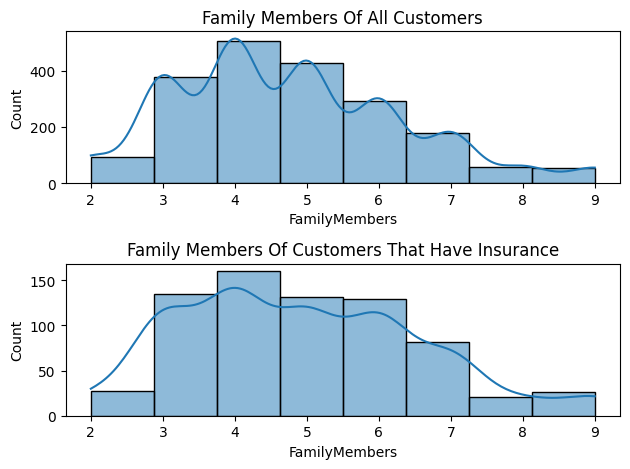

In [10]:
#Family Members Of All Customers
plt.subplot(2, 1, 1)
sea.histplot(data=df, x="FamilyMembers", bins=8,kde=True)
plt.title("Family Members Of All Customers")

#Family Members Of Customers That Have Insurance
plt.subplot(2, 1, 2)
sea.histplot(data=df[(df["TravelInsurance"] == 1)], x="FamilyMembers", bins=8,kde=True)
plt.title("Family Members Of Customers That Have Insurance")

#For solving the issue of overlapping titles
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

plt.show()

* Family members does not have a major effect on travel insurance.

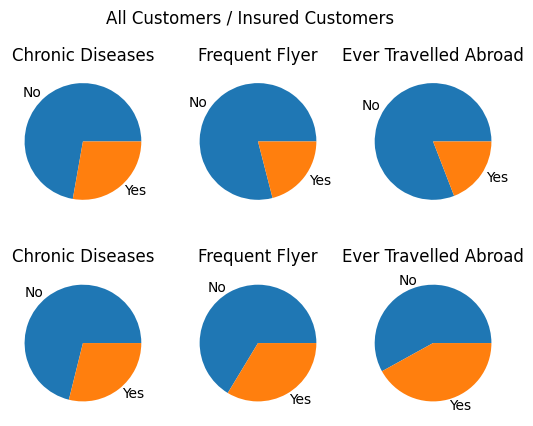

In [11]:
plt.suptitle("All Customers / Insured Customers")

#ChronicDiseases
plt.subplot(2, 3, 1)
plt.pie(df["ChronicDiseases"].value_counts(), labels=["No","Yes"])
plt.title("Chronic Diseases")

#FrequentFlyer	
plt.subplot(2, 3, 2)
plt.pie(df["FrequentFlyer"].value_counts(), labels=["No","Yes"])
plt.title("Frequent Flyer")

#EverTravelledAbroad
plt.subplot(2, 3, 3)
plt.pie(df["EverTravelledAbroad"].value_counts(), labels=["No","Yes"])
plt.title("Ever Travelled Abroad")




#ChronicDiseases
plt.subplot(2, 3, 4)
plt.pie(df[df["TravelInsurance"] == 1]["ChronicDiseases"].value_counts(), labels=["No","Yes"])
plt.title("Chronic Diseases")

#FrequentFlyer	
plt.subplot(2, 3, 5)
plt.pie(df[df["TravelInsurance"] == 1]["FrequentFlyer"].value_counts(), labels=["No","Yes"])
plt.title("Frequent Flyer")

#EverTravelledAbroad
plt.subplot(2, 3, 6)
plt.pie(df[df["TravelInsurance"] == 1]["EverTravelledAbroad"].value_counts(), labels=["No","Yes"])
plt.title("Ever Travelled Abroad")


plt.show()

* Having a chronic disease does not have a major effect on travel insurance.
* Flying frequently has a positive effect on buying travel insurance.
* Traveling abroad before has a positive effect on buying travel insurance.



---
**Modelling**


In [12]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


* Deleting unusable index column.

In [13]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [14]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


* Changing all object-type columns to integer

In [16]:
df["Employment Type"]=df["Employment Type"].map({"Private Sector/Self Employed":0, "Government Sector":1})
df["GraduateOrNot"]=df["GraduateOrNot"].map({"No":0, "Yes":1})
df["FrequentFlyer"]=df["FrequentFlyer"].map({"No":0, "Yes":1})
df["EverTravelledAbroad"]=df["EverTravelledAbroad"].map({"No":0, "Yes":1})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


* 1 : Yes , 0 : No
* Government Sector : 1 , Private Sector : 0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int64
 2   GraduateOrNot        1987 non-null   int64
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int64
 7   EverTravelledAbroad  1987 non-null   int64
 8   TravelInsurance      1987 non-null   int64
dtypes: int64(9)
memory usage: 139.8 KB


* Dataset is ready for modelling


---



In [18]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


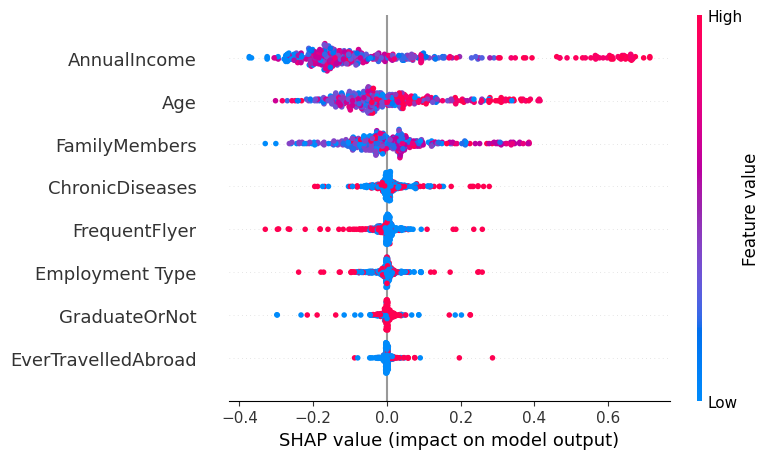

In [19]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['TravelInsurance'], axis=1), df['TravelInsurance'], test_size=0.2)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

* As we see **annual income** has the most impact on our model as well as **age** and **family members** too. We will create our model based on these 3 variable.

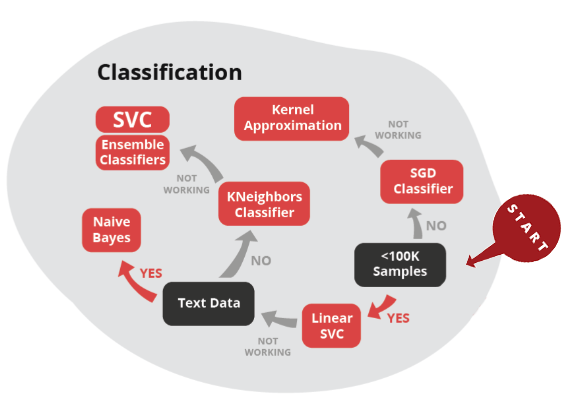

* Our problem is a classification problem and has 2k samples so we can use linear svc, linear svm

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

x = np.array(df[["Age","AnnualIncome","FamilyMembers"]])
y = np.array(df["TravelInsurance"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

* We are getting training and test data
* Using mainly the three variable we found before

In [21]:
from sklearn import svm
from sklearn import metrics

mySVC = svm.SVC()
mySVC.fit(x_train,y_train)


print("Accuracy : ",  metrics.accuracy_score(y_test, mySVC.predict(x_test)))
print("Precision : ", metrics.precision_score(y_test, mySVC.predict(x_test)))

Accuracy :  0.8090452261306532
Precision :  0.9104477611940298


* With support vector classification (SVC) we made our basic model with quite good accuracy but we can improve it with hyperparameters.

In [22]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

grid_search = GridSearchCV(mySVC,param_grid,refit=True,verbose=2)
grid_search.fit(x_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01

* We find the best parameters using **Grid Search** and improve our accuracy from %80.9 to %83.6 with hyperparameters


In [26]:
finalModel = svm.SVC(C=100, gamma= 0.01, kernel= "rbf" )
finalModel.fit(x_train,y_train)
finalModel_y_pred = finalModel.predict(x_test)

* Our final model is ready

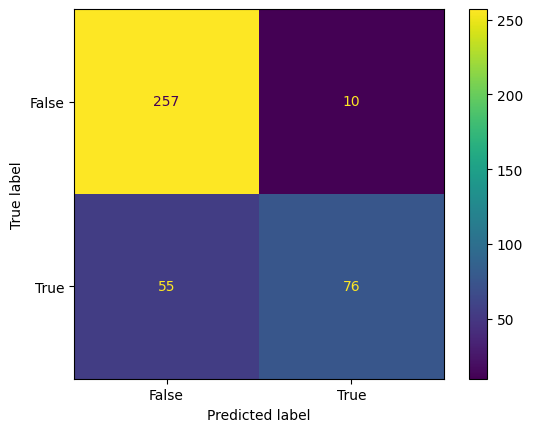

In [27]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, finalModel_y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

In [28]:
print("Accuracy : ",  metrics.accuracy_score(y_test, finalModel_y_pred))
print("Precision : ", metrics.precision_score(y_test, finalModel_y_pred))
print("Recall : ", metrics.recall_score(y_test, finalModel_y_pred))
print("F1 : ",metrics.f1_score(y_test, finalModel_y_pred))

Accuracy :  0.8366834170854272
Precision :  0.8837209302325582
Recall :  0.5801526717557252
F1 :  0.7004608294930876
